In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import decimal  
import sys
import scipy
from sklearn.utils import shuffle
import math

In [343]:
df = pd.read_csv("input.csv",header=None)
#df = shuffle(df)
print (df.head(10))
# total 699 rows we use top 80 %  for train that means 0:560
total = 0 
for i in range(0,10):
    print ("round ",i)
    total = 0
    non_question =0
    for index,x in enumerate(df[i]):
        if x != '?':
            total+=int(x)
            non_question+=1
    print ("mean is ",total/non_question)
    df[i]=df[i].replace("?",total/non_question)
def top_down():
    x_train  = df[:][:560]
    x_test = df[:][560:]
    del x_train[10]
    del x_train[0]
    del x_test[10]
    del x_test[0]

    #print (df[0:5][0:10])
    y_train = df[10][0:560]
    y_test = df[10][560:]
    y_pred = knn_classifier(x_test,x_train,y_train,2,2)
    acc = 0
    for val1,val2 in zip(y_pred,y_test):
        if val1==val2:
            acc+=1
    print("accuracy : ",acc/len(y_test))

        0   1   2   3   4   5   6   7   8   9   10
0  1000025   5   1   1   1   2   1   3   1   1   2
1  1002945   5   4   4   5   7  10   3   2   1   2
2  1015425   3   1   1   1   2   2   3   1   1   2
3  1016277   6   8   8   1   3   4   3   7   1   2
4  1017023   4   1   1   3   2   1   3   1   1   2
5  1017122   8  10  10   8   7  10   9   7   1   4
6  1018099   1   1   1   1   2  10   3   1   1   2
7  1018561   2   1   2   1   2   1   3   1   1   2
8  1033078   2   1   1   1   2   1   1   1   5   2
9  1033078   4   2   1   1   2   1   2   1   1   2
round  0
mean is  1071704.0987124464
round  1
mean is  4.417739628040057
round  2
mean is  3.13447782546495
round  3
mean is  3.207439198855508
round  4
mean is  2.8068669527896994
round  5
mean is  3.216022889842632
round  6
mean is  3.5446559297218156
round  7
mean is  3.4377682403433476
round  8
mean is  2.866952789699571
round  9
mean is  1.5894134477825466


In [3]:
def distance_LP(x,y,p):
    #print("this function is for calculating distance_LP")
    distance=0
    for val1,val2 in zip(x,y):
        val1 = int(val1)
        val2 = int(val2)
        
        #print ("value 1,2 :",val1,val2)
        distance += math.pow(abs(val1-val2),p)
        #distance = math.pow(distance,1/p)
        #print ("distance sum is ",distance)
    return distance
def knn_classifier(x_test,x_train,y_train,k,p):
    y_pred =[]
    for x in x_test.values:
        #print (x[:])
        
        distance_record=[]
        index =0
        for y  in(x_train.values):
            dist = distance_LP(x,y,p)
            distance_record.append(int(dist))
        index_sort =sorted(range(len(distance_record)), key=lambda k: distance_record[k])
            #this will record the sorted list index for example, the 1th in position k 
        for val in index_sort:
            if val>630:
                print ("wow ",index_sort)
        num = 0 
        for i in range(k):
            #print ("index: ",index_sort[i])
            num += y_train[index_sort[i]]
            
        if num >= 3*k:
            y_pred.append(4)
        else:
            y_pred.append(2)
    return y_pred


In [4]:
def split_data(k):
    train_start = int(699/10*k)
    train_end = int(699/10*(k+1))
    x_test= df.iloc[np.r_[train_start:train_end],1:10]
    x_train = df.iloc[np.r_[0:train_start,train_end:699],1:10]
    #x_test=x_test.reset_index()
    #x_train=x_train.reset_index()
    y_test= df.iloc[np.r_[train_start:train_end],10]
    y_test=y_test.reset_index(drop=True)
    y_train= df.iloc[np.r_[0:train_start,train_end:699],10]
    y_train = y_train.reset_index(drop=True)
    return x_train,x_test,y_train,y_test



In [5]:
def output_df_mean_der(acc_df,sensitivity_df,specificy_df,p):
    print ("this is output of p = ",p)
    acc_mean=[]
    sen_mean = []
    spec_mean = []
    acc_std=[]
    sen_std = []
    spec_std = []
    for i in range(10):
        acc_mean.append( acc_df[i].mean())
        acc_std.append( np.std(acc_df[i]))
        sen_mean.append( sensitivity_df[i].mean())
        sen_std.append( np.std(sensitivity_df[i]))
        spec_mean.append( specificy_df[i].mean())
        spec_std.append( np.std(specificy_df[i]))
    
    print ("acc_mean and std")
    print (acc_mean)
    print (acc_std)
    print ("sensitivy mean and std")
    print (sen_mean)
    print (sen_std)
    print ("specifity mean and std")
    print (spec_mean)
    print (spec_std)
    x = range(1,11)
    plt.figure(figsize=(10,10))
    plt.errorbar(x, acc_mean, acc_std,marker='s')
    plt.title("accuracy ")
    plt.savefig("accracy"+str(p))
    plt.show()
    plt.errorbar(x, sen_mean, sen_std, marker='s')
    plt.title("sensitivity")
    plt.savefig("sensitivity"+str(p))
    plt.show()
    plt.errorbar(x, spec_mean, spec_std, marker='s')
    plt.title("specificity")
    plt.savefig("specificity"+str(p))
    plt.show()
def cross_val():
    # 2 for positive 4 for negative
    #accuracy sensitivity and specificy
    for p in range(1,3):
        acc_data = []#row i for store fold i in k (0:10) NN resut
        sensitivity_data = []#TP/(TP+FN)
        specificy_data = []#TN/(TN+FP)
        for k_round in range(0,10):
            print ("this is 10 fold the  ",k_round,"round")
            x_train,x_test,y_train,y_test = split_data(k_round)

            for k in range(1,11):#1-NN to 10-NN
                y_pred = knn_classifier(x_test,x_train,y_train,k,p)
                accruacy=0
                TP = 0
                FN = 0
                FP = 0
                TN = 0
                for val1,val2 in zip(y_pred,y_test):
                    if val1 ==val2:
                        accruacy+=1
                    if val1 == val2 and val1== 2:
                        TP+=1
                    elif val1 == val2 and val1== 4:
                        TN+=1
                    elif val1 != val2 and val1== 4:
                        FN+=1
                    elif val1 != val2 and val1== 2:
                        FP+=1
                acc_data.append(accruacy/len(y_test))
                sensitivity_data.append(TP/(TP+FN))
                specificy_data.append(TN/(TN+FP))
                #print ("accuray is %d / %d",accruacy,len(y_test))
        acc_df = pd.DataFrame(np.array(acc_data).reshape(10,10))
        sensitivity_df=pd.DataFrame(np.array(sensitivity_data).reshape(10,10))
        specificy_df=pd.DataFrame(np.array(specificy_data).reshape(10,10))
        print (acc_df)
        print (sensitivity_df)
        print (specificy_df)
        output_df_mean_der(acc_df,sensitivity_df,specificy_df,p)

In [338]:
def draw_out(w0_data,wrand_data):
    for i in range(3):
        x = range(1,3)
        mean = []
        std = []
        mean.append(w0_data[i*2])
        mean.append(wrand_data[i*2])
        std.append(w0_data[i*2+1])
        std.append(wrand_data[i*2+1])
        plt.figure(figsize=(10,10))
        plt.errorbar(x, mean, std,marker='s')
        plt.title("w0vswrand")
        plt.savefig("w0vswrand"+str(i))
        plt.show()
def sign(value):
    if value>=0:
        return (1)
    elif value <0:
        return (-1)
def classify_perceptron(w_res,x_test):#
    print("start testing")
    y_pred = []
    for x in (x_test.values):
        pred = 0 
        for feature,w in zip(x,w_res):
            pred += float(feature)*float(w)
        if pred >0:
            y_pred.append(4)
        else:
            y_pred.append(2)
    return y_pred
def perceptron_train(input_x,output_y,w_int):
    l_rate = 0.1 #learning rate 
    round = 0
    error = len(w_int)
    while error>0 and round <400: # if no erro => perfect
        round +=1
        delta = []# error of pred and real
        error = 0 #num of error prediction
        for x ,y in zip(input_x.values,output_y):#input_x.values => each row 
            y_val=0
            if y ==4:
                y_val = 1
            elif y ==2:
                y_val = (-1)
            pred = 0
            for feature,w in zip(x,w_int):
                pred += float(feature)*float(w)
            pred = sign(pred+0.1)#0.1 is bias
            if pred != y_val :
                error +=1
            delta_y = int(y_val) -int(pred) 
            for i in range(len(w_int)):               
                w_int[i]+= 0.1*int(delta_y)*float(x[i])
        #print ("erorr acc ",error ,1-error/len(output_y))
    return w_int
def perceptron():#this function is to help me run my experiment
    w0_data = []
    wrand_data=[]
    for times in range(2):
        acc_data = []
        sensitivity_data = []#TP/(TP+FN)
        specificy_data = []#TN/(TN+FP)
        if times ==0:
            w_int = np.zeros(9)
            print ("intial weight")
            print (w_int)
        else:
            w_int = np.random.rand(9)
            print ("intial weight")
            print (w_int)
        for k_round in range(0,10):
            print ("fold-"+str(k_round))
            x_train,x_test,y_train,y_test = split_data(k_round)
            w_res = perceptron_train(x_train,y_train,w_int)
            print ("done training")
            y_pred = classify_perceptron(w_res,x_test)
            TP=TN=FN=FP=0
            for val1,val2 in zip(y_pred,y_test):
                if val1 == val2 and val1== 2:
                    TP+=1
                elif val1 == val2 and val1== 4:
                    TN+=1
                elif val1 != val2 and val1== 4:
                    FN+=1
                elif val1 != val2 and val1== 2:
                    FP+=1
            acc_data.append(float((TP+TN)/len(y_test)))
            sensitivity_data.append(float((TP)/(TP+FN)))
            specificy_data.append(float((TN)/(TN+FP)))
        mean_acc = np.mean(acc_data) 
        mean_sen= np.mean(sensitivity_data)
        mean_spec = np.mean(specificy_data)
        
        print ("acc_data: ",mean_acc)
        print (acc_data)
        print ("sensitivity_data: ",mean_sen)
        print (sensitivity_data)
        print ("specificy_data: ",mean_spec)
        print (specificy_data)
        if times == 0:
            w0_data.append(mean_acc)
            w0_data.append(np.std(acc_data))
            w0_data.append(mean_sen)
            w0_data.append(np.std(sensitivity_data))
            w0_data.append(mean_spec)
            w0_data.append(np.std(specificy_data))
        else:
            wrand_data.append(mean_acc)
            wrand_data.append(np.std(acc_data))
            wrand_data.append(mean_sen)
            wrand_data.append(np.std(sensitivity_data))
            wrand_data.append(mean_spec)
            wrand_data.append(np.std(specificy_data))
    draw_out(w0_data,wrand_data)
        

this is main
this is 10 fold the   0 round
this is 10 fold the   1 round
this is 10 fold the   2 round
this is 10 fold the   3 round
this is 10 fold the   4 round
this is 10 fold the   5 round
this is 10 fold the   6 round
this is 10 fold the   7 round
this is 10 fold the   8 round
this is 10 fold the   9 round
          0         1         2         3         4         5         6  \
0  0.898551  0.913043  0.840580  0.855072  0.826087  0.855072  0.840580   
1  0.985714  1.000000  0.985714  0.985714  0.985714  1.000000  0.985714   
2  0.985714  0.985714  0.985714  0.985714  0.985714  0.985714  0.985714   
3  0.914286  0.942857  0.942857  0.942857  0.942857  0.942857  0.928571   
4  0.957143  0.942857  0.971429  0.957143  0.942857  0.942857  0.942857   
5  0.971429  0.971429  0.971429  0.985714  0.985714  0.971429  0.957143   
6  0.985714  0.971429  0.971429  0.971429  0.971429  0.971429  0.971429   
7  0.971429  0.985714  0.985714  0.985714  0.985714  0.985714  0.985714   
8  0.985714 

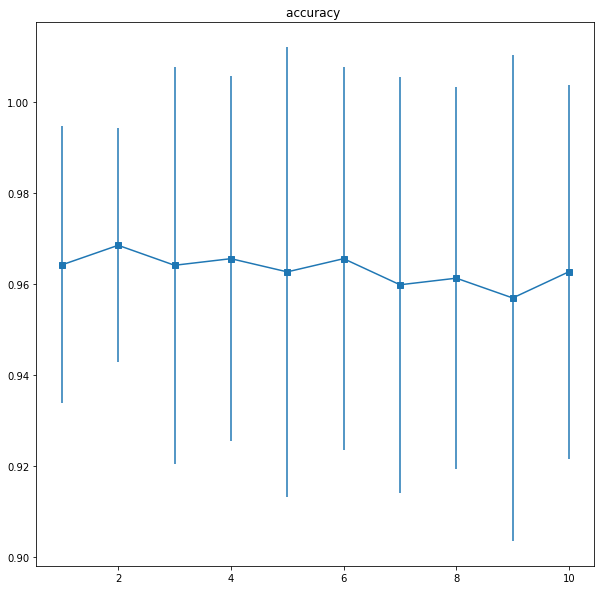

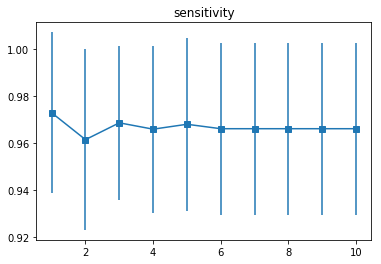

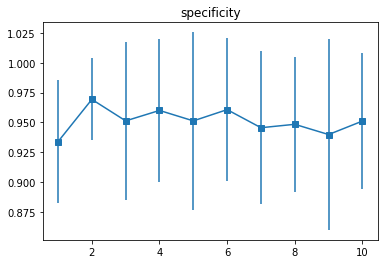

this is 10 fold the   0 round
this is 10 fold the   1 round
this is 10 fold the   2 round
this is 10 fold the   3 round
this is 10 fold the   4 round
this is 10 fold the   5 round
this is 10 fold the   6 round
this is 10 fold the   7 round
this is 10 fold the   8 round
this is 10 fold the   9 round
          0         1         2         3         4         5         6  \
0  0.840580  0.884058  0.840580  0.869565  0.855072  0.898551  0.869565   
1  0.971429  0.985714  1.000000  1.000000  1.000000  1.000000  0.985714   
2  0.971429  0.971429  0.985714  0.985714  0.985714  0.985714  0.985714   
3  0.914286  0.942857  0.942857  0.942857  0.942857  0.942857  0.942857   
4  0.942857  0.957143  0.957143  0.942857  0.942857  0.942857  0.942857   
5  0.971429  0.971429  0.971429  0.985714  0.985714  0.985714  0.971429   
6  0.971429  0.971429  0.971429  0.985714  0.985714  0.985714  0.971429   
7  0.971429  1.000000  0.985714  0.971429  0.985714  0.985714  0.985714   
8  0.985714  0.985714  0.

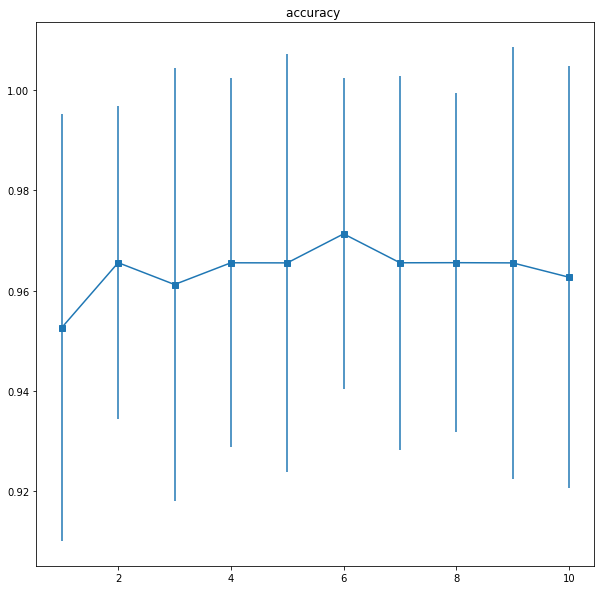

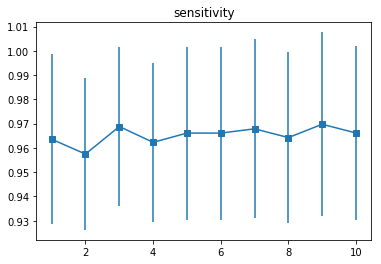

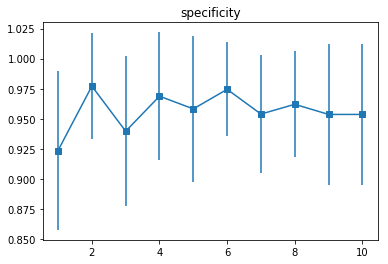

done


In [345]:
def main():
    print ("this is main")

    #top_down()#this is for KNN testing top 80% for train down 20% for test and k = 2 , p=2
    cross_val()#question two cross_val
    # ==========extra credit belowed
    #perceptron()
    print ("done")
if __name__ == "__main__":
    main()

In [395]:
print (df.iloc[0:15,1:10])

    1   2   3   4  5   6  7  8  9
0   5   1   1   1  2   1  3  1  1
1   5   4   4   5  7  10  3  2  1
2   3   1   1   1  2   2  3  1  1
3   6   8   8   1  3   4  3  7  1
4   4   1   1   3  2   1  3  1  1
5   8  10  10   8  7  10  9  7  1
6   1   1   1   1  2  10  3  1  1
7   2   1   2   1  2   1  3  1  1
8   2   1   1   1  2   1  1  1  5
9   4   2   1   1  2   1  2  1  1
10  1   1   1   1  1   1  3  1  1
11  2   1   1   1  2   1  2  1  1
12  5   3   3   3  2   3  4  4  1
13  1   1   1   1  2   3  3  1  1
14  8   7   5  10  7   9  5  5  4


[2.5, 5.0, 7.5, 10.0, 12.5, 15.0, 17.5, 20.0, 22.5, 25.0, 27.5, 30.0, 32.5, 35.0, 37.5, 40.0, 42.5, 45.0, 47.5, 50.0, 52.5, 55.0, 57.5, 60.0, 62.5, 65.0, 67.5, 70.0, 72.5, 75.0, 77.5, 80.0, 82.5, 85.0, 87.5, 90.0, 92.5, 95.0, 97.5, 100.0, 102.5, 105.0, 107.5, 110.0, 112.5, 115.0, 117.5, 120.0, 122.5, 125.0, 127.5, 130.0, 132.5, 135.0, 137.5, 140.0, 142.5, 145.0, 147.5, 150.0, 152.5, 155.0, 157.5, 160.0, 162.5, 165.0, 167.5, 170.0, 172.5, 175.0, 177.5, 180.0, 182.5, 185.0, 187.5, 190.0, 192.5, 195.0, 197.5, 200.0, 202.5, 205.0, 207.5, 210.0, 212.5, 215.0, 217.5, 220.0, 222.5, 225.0, 227.5, 230.0, 232.5, 235.0, 237.5, 240.0, 242.5, 245.0, 247.5, 250.0]
       0      1      2      3      4      5      6      7      8      9
0    2.5    5.0    7.5   10.0   12.5   15.0   17.5   20.0   22.5   25.0
1   27.5   30.0   32.5   35.0   37.5   40.0   42.5   45.0   47.5   50.0
2   52.5   55.0   57.5   60.0   62.5   65.0   67.5   70.0   72.5   75.0
3   77.5   80.0   82.5   85.0   87.5   90.0   92.5   

<ErrorbarContainer object of 3 artists>

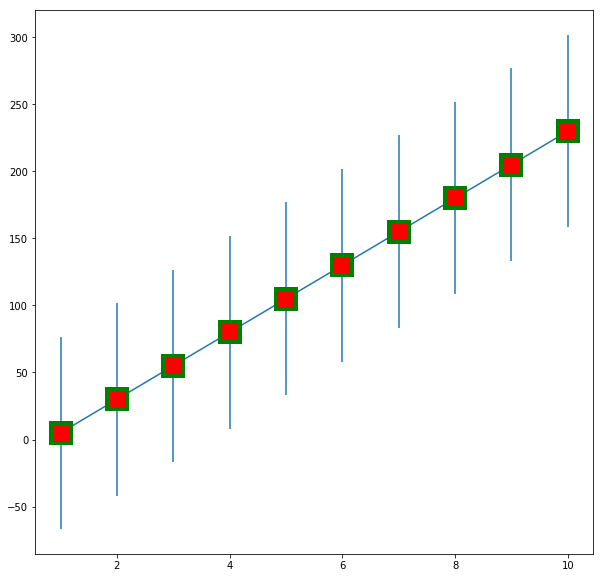

In [59]:
data = []
for i in range(1,101):
    data.append(i+i*1.5)
print (data)
test_df = pd.DataFrame(np.array(data).reshape(10,10))
print (test_df)
print (test_df[1].mean())
print (np.std(test_df[1]))
x= range(1,11)
y = test_df[1]
y_err = np.std(test_df[1])
plt.figure(figsize=(10,10))
plt.errorbar(x, y, y_err, marker='s', mfc='red',
         mec='green', ms=20, mew=4)